In [12]:
import numpy as np
#Finding hamming distance function
_xormap = {('0', '1'): '1', ('1', '0'): '1', ('1', '1'): '0', ('0', '0'): '0'}
def xor(x, y):
    return (''.join([_xormap[a, b] for a, b in zip(x, y)])).count('0')

#Readin allfingerprintfiles and store it in a list
def stringViewList(filename):

  file_view = open(filename, 'r')
  list_view = []

  while True:

    line2 = file_view.readline()

    if not line2:
      break
    list_view.append(line2.split())

  file_view.close()

  return list_view


#orginal filename overView_allfingerprint.txt, dosoverView_allfingerprint.txt
list_overview = stringViewList('/content/overView_allfingerprint.txt')
list_dosoverview = stringViewList('/content/dosoverView_allfingerprint.txt')


# for getting all pairs similarity score between Overview and Dosoverview 
# we need to remove 20 and uncommenting len(list_overview) and len(list_dosoverview)
len_oview = 1000
len_dview = 1000 

similarityBetweenOverviewDosoverview = {}
similarity_array_dosoverview = np.zeros(len_dview)
for i in range(0, len_dview):
  for j in range(0, len_oview):
    xor_distance = xor(list_dosoverview[i][0], list_overview[j][0])
    hamming_distance = xor_distance/128
    #similarityBetweenOverviewDosoverview[ str("Dosoverview graph ")+str(i+1)+str(" and ") + str("OverView graph ") +str(j+1) ] = str(hamming_distance)
    if similarity_array_dosoverview[i] < hamming_distance:
      similarity_array_dosoverview[i] = hamming_distance



# Below for loop print the similarity scores between all pairs of overview and dosoverview graph

# for key,val in similarityBetweenOverviewDosoverview.items():
#    print("Similarity score betwen "+key+" -----> "+ val )


# print the maximum similarity score of dosoverview graph after comparing with all others overview graph
# print("Maximum similarity score of dosoverview graph after comparing with all overview graphs")
# print(similarity_array_dosoverview)

similarity_array_overview = np.zeros(len_oview)
for i in range(0, len_oview):
  for j in range(0, len_dview):
    xor_distance = xor(list_dosoverview[j][0], list_overview[i][0])
    hamming_distance = xor_distance/128
    if similarity_array_overview[i] < hamming_distance:
      similarity_array_overview[i] = hamming_distance


# print("Maximum similarity score of overview graph after comparing with all dosoverview graphs")
# print(similarity_array_overview)





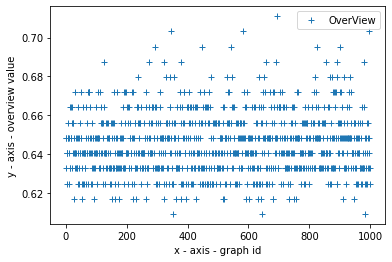

In [11]:
import matplotlib.pyplot as plt 
  
x2 = [i for i in range (0,1000)] 

y2 =  similarity_array_dosoverview


x1 = [i for i in range (0,1000)] 

y1 =  similarity_array_overview
  
plt.plot(x1,y1,'+', label ='OverView')
#plt.plot(x2,y2,'+', label = 'Dosoverview')


plt.xlabel('x - axis - graph id')

plt.ylabel('y - axis - overview value')

#plt.title('Overview, Dosoverview')
plt.legend()
plt.show()
